In [1]:
!pip install pandas numpy matplotlib scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.drop('species', axis=1)
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


🌳 Decision Tree Model Results
-----------------------------
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



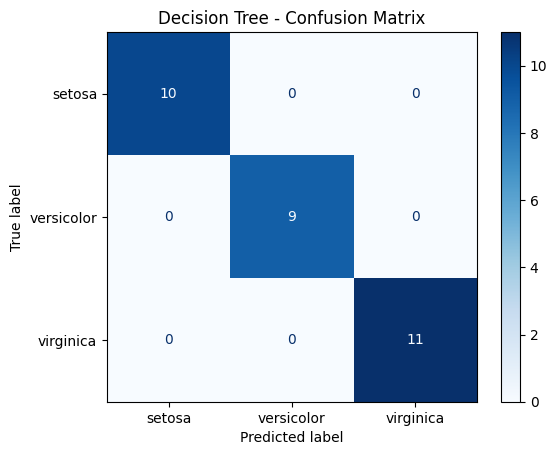

In [3]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


print("🌳 Decision Tree Model Results")
print("-----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=iris.target_names).plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Logistic Regression Model Results
-----------------------------------
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



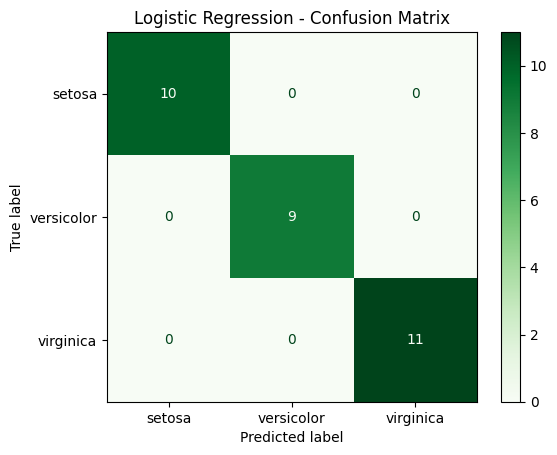

In [5]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Logistic Regression Model Results")
print("-----------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=iris.target_names).plot(cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


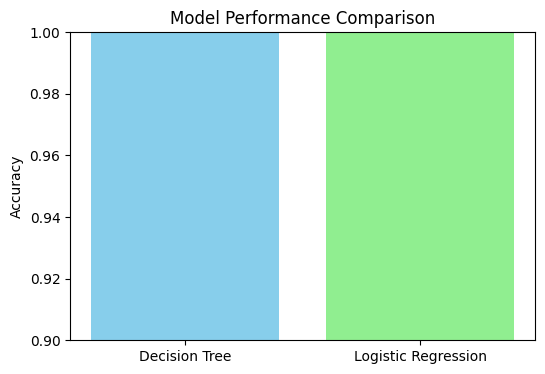

Decision Tree Accuracy: 1.000
Logistic Regression Accuracy: 1.000


In [6]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
plt.bar(['Decision Tree', 'Logistic Regression'], [accuracy_dt, accuracy_lr], color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.9, 1.0)
plt.show()

print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.3f}")
